In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean,jensenshannon,cosine

In [3]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female
m_df = load_male_long_df(average_weeks=False, merge_size=False, merge_ages=True, df_path=DF_PATHS.usage_male).groupby(['age','mouse']).mean()
f_df = load_female_long_df(average_weeks=False, merge_size=False, filter_female=True, merge_ages=True, df_path=DF_PATHS.usage_female).groupby(['age','mouse']).mean()
m_df['sex'] = 'm'
f_df['sex'] = 'f'

# Combine male and female data into a single DataFrame
combined_df = pd.concat([m_df, f_df])
combined_df.set_index('sex', inplace=True, append=True)

In [4]:
len(combined_df_df)

4947

In [4]:
data=combined_df.copy()

In [5]:
format_plots()

In [6]:
# Function to filter weeks with more than m measures
n=3
def filter_valid_weeks(df):
    # Create a week identifier
    df = df.reset_index()
    df['week'] = df['age'].astype(float) // 1
    
    # Filter weeks with more than 3 measures
    valid_weeks = df.groupby(['mouse', 'sex', 'week']).filter(lambda x: len(x) > n)
    return valid_weeks.set_index(['mouse', 'age', 'sex','week'])

df_valid = filter_valid_weeks(data)

In [7]:
## calcualte for all pairwise combinations

In [8]:
# Function to calculate pairwise Euclidean distance
def calculate_pairwise_euclidean(df):
    return df.groupby(level='mouse').apply(
        lambda x: np.mean([euclidean(x.iloc[i], x.iloc[j]) for i in range(len(x)) for j in range(i+1, len(x))])
    ).reset_index(name='euclidean_distance')

# Function to calculate pairwise JSD distance
def calculate_pairwise_jsd(df):
    return df.groupby(level='mouse').apply(
        lambda x: np.mean([jensenshannon(x.iloc[i], x.iloc[j]) for i in range(len(x)) for j in range(i+1, len(x))])
    ).reset_index(name='jsd_distance')

# Function to calculate pairwise JSD distance
def calculate_pairwise_cosine(df):
    return df.groupby(level='mouse').apply(
        lambda x: np.mean([cosine(x.iloc[i], x.iloc[j]) for i in range(len(x)) for j in range(i+1, len(x))])
    ).reset_index(name='cosine_distance')

# Calculate distances
euclidean_df = df_valid.groupby(['week', 'sex']).apply(calculate_pairwise_euclidean).reset_index(level=2, drop=True).reset_index()
jsd_df = df_valid.groupby(['week', 'sex']).apply(calculate_pairwise_jsd).reset_index(level=2, drop=True).reset_index()
cosine_df = df_valid.groupby(['week', 'sex']).apply(calculate_pairwise_cosine).reset_index(level=2, drop=True).reset_index()

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

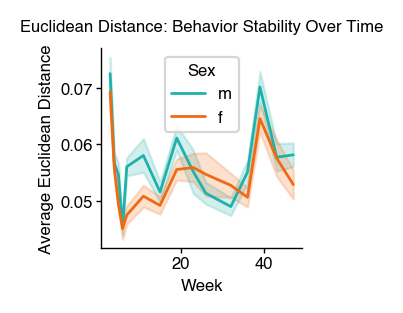

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

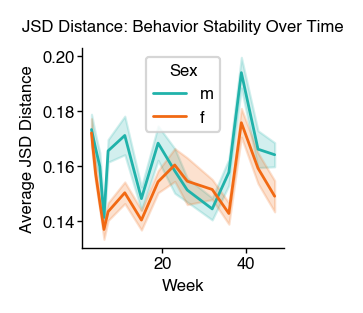

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

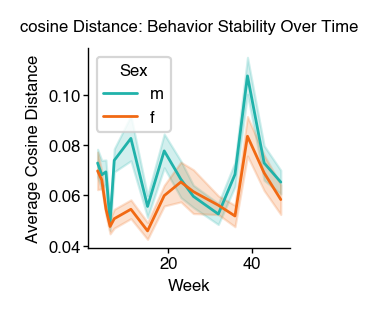

In [9]:
# Plotting Euclidean distances by week without outliers
plt.figure(figsize=(1.3, 1.3))
sns.lineplot(x='week', y='euclidean_distance', data=euclidean_df,  hue='sex', hue_order=['m','f'], 
             palette=['#20B2AA', '#f16913'], errorbar=('se'))
plt.title('Euclidean Distance: Behavior Stability Over Time')
plt.xlabel('Week')
plt.ylabel('Average Euclidean Distance')
plt.legend(title='Sex')
sns.despine()
plt.show()

# Plotting JSD distances by week without outliers
plt.figure(figsize=(1.3, 1.3))
sns.lineplot(data=jsd_df, x='week', y='jsd_distance', hue='sex', hue_order=['m','f'], 
             palette=['#20B2AA', '#f16913'], errorbar=('se'))
plt.title('JSD Distance: Behavior Stability Over Time')
plt.xlabel('Week')
plt.ylabel('Average JSD Distance')
plt.legend(title='Sex')
sns.despine()
plt.show()

# Plotting cosine distances by week without outliers
plt.figure(figsize=(1.3, 1.3))
sns.lineplot(x='week', y='cosine_distance', data=cosine_df,  hue='sex', hue_order=['m','f'], 
             palette=['#20B2AA', '#f16913'], errorbar=('se'))
plt.title('cosine Distance: Behavior Stability Over Time')
plt.xlabel('Week')
plt.ylabel('Average Cosine Distance')
plt.legend(title='Sex')
sns.despine()
plt.show()

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

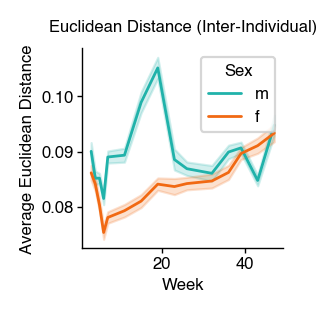

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

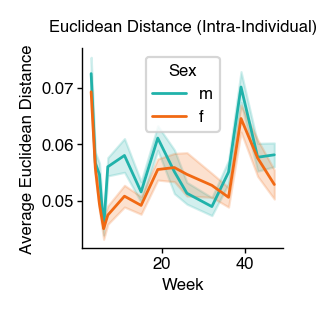

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

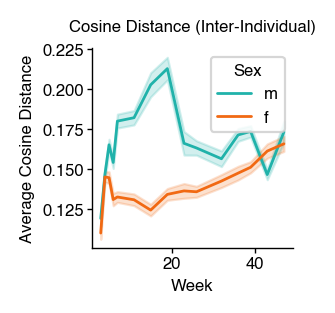

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

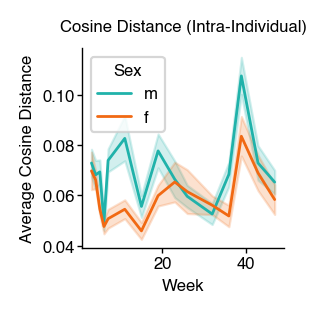

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

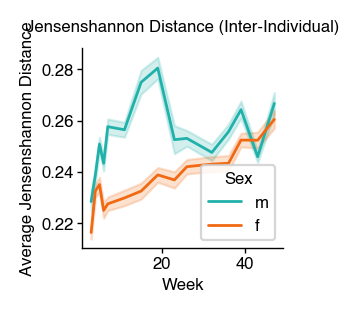

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarn

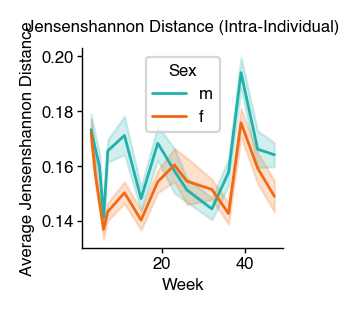

In [10]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cosine, jensenshannon
import matplotlib.pyplot as plt
import seaborn as sns

# Function to filter weeks with more than n measures
n = 3
def filter_valid_weeks(df):
    df = df.reset_index()
    df['week'] = df['age'].astype(float) // 1
    valid_weeks = df.groupby(['mouse', 'sex', 'week']).filter(lambda x: len(x) > n)
    return valid_weeks.set_index(['mouse', 'age', 'sex', 'week'])

# Function to calculate pairwise distances
def calculate_pairwise_distances(df, distance_func):
    distance_list = []
    for (week, sex), group in df.groupby(['week', 'sex']):
        mice = group.index.get_level_values('mouse').unique()
        for i in range(len(mice)):
            for j in range(i + 1, len(mice)):
                mouse_i_data = group.xs(mice[i], level='mouse', drop_level=False)
                mouse_j_data = group.xs(mice[j], level='mouse', drop_level=False)
                distance = np.mean([distance_func(mouse_i_data.iloc[k], mouse_j_data.iloc[l])
                                    for k in range(len(mouse_i_data)) for l in range(len(mouse_j_data))])
                distance_list.append((week, sex, distance))
    distance_df = pd.DataFrame(distance_list, columns=['week', 'sex', f'{distance_func.__name__}_distance'])
    return distance_df

# Function to calculate intra-individual distances within the same sex
def calculate_intra_individual_distances(df, distance_func):
    intra_distances = []
    for (week, sex), group in df.groupby(['week', 'sex']):
        mice = group.index.get_level_values('mouse').unique()
        for mouse in mice:
            mouse_data = group.xs(mouse, level='mouse', drop_level=False)
            distance = np.mean([distance_func(mouse_data.iloc[i], mouse_data.iloc[j]) for i in range(len(mouse_data)) for j in range(i + 1, len(mouse_data))])
            intra_distances.append((week, sex, mouse, distance))
    intra_df = pd.DataFrame(intra_distances, columns=['week', 'sex', 'mouse', f'{distance_func.__name__}_distance'])
    return intra_df

# Function to plot distances
def plot_distances(df, distance_name, distance_type):
    plt.figure(figsize=(1.3, 1.3))
    sns.lineplot(x='week', y=f'{distance_name}_distance', hue='sex', hue_order=['m','f'],data=df, palette=['#20B2AA', '#f16913'], errorbar=('se'))
    plt.title(f'{distance_name.capitalize()} Distance ({distance_type})')
    plt.xlabel('Week')
    plt.ylabel(f'Average {distance_name.capitalize()} Distance')
    plt.legend(title='Sex')
    sns.despine()
    plt.show()

# Main processing
distances = [euclidean, cosine, jensenshannon]

df_valid = filter_valid_weeks(data)

for distance_func in distances:
    inter_individual_distances = calculate_pairwise_distances(df_valid, distance_func)
    intra_individual_distances = calculate_intra_individual_distances(df_valid, distance_func)

    plot_distances(inter_individual_distances, distance_func.__name__, 'Inter-Individual')
    plot_distances(intra_individual_distances, distance_func.__name__, 'Intra-Individual')

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


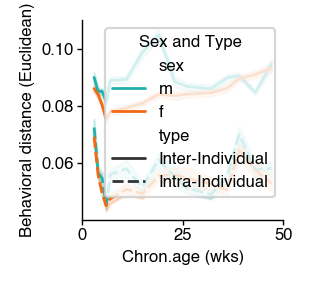

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


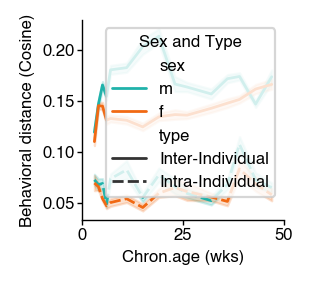

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


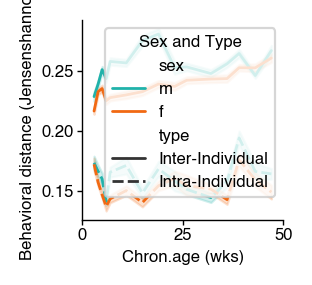

In [11]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cosine, jensenshannon
import matplotlib.pyplot as plt
import seaborn as sns

# Function to filter weeks with more than n measures
n = 3
def filter_valid_weeks(df):
    df = df.reset_index()
    df['week'] = df['age'].astype(float) // 1
    valid_weeks = df.groupby(['mouse', 'sex', 'week']).filter(lambda x: len(x) > n)
    return valid_weeks.set_index(['mouse', 'age', 'sex', 'week'])

# Function to calculate pairwise distances
def calculate_pairwise_distances(df, distance_func):
    distance_list = []
    for (week, sex), group in df.groupby(['week', 'sex']):
        mice = group.index.get_level_values('mouse').unique()
        for i in range(len(mice)):
            for j in range(i + 1, len(mice)):
                mouse_i_data = group.xs(mice[i], level='mouse', drop_level=False)
                mouse_j_data = group.xs(mice[j], level='mouse', drop_level=False)
                distance = np.mean([distance_func(mouse_i_data.iloc[k], mouse_j_data.iloc[l])
                                    for k in range(len(mouse_i_data)) for l in range(len(mouse_j_data))])
                distance_list.append((week, sex, 'Inter-Individual', distance))
    distance_df = pd.DataFrame(distance_list, columns=['week', 'sex', 'type', f'{distance_func.__name__}_distance'])
    return distance_df

# Function to calculate intra-individual distances within the same sex
def calculate_intra_individual_distances(df, distance_func):
    intra_distances = []
    for (week, sex), group in df.groupby(['week', 'sex']):
        mice = group.index.get_level_values('mouse').unique()
        for mouse in mice:
            mouse_data = group.xs(mouse, level='mouse', drop_level=False)
            distance = np.mean([distance_func(mouse_data.iloc[i], mouse_data.iloc[j]) for i in range(len(mouse_data)) for j in range(i + 1, len(mouse_data))])
            intra_distances.append((week, sex, 'Intra-Individual', distance))
    intra_df = pd.DataFrame(intra_distances, columns=['week', 'sex', 'type', f'{distance_func.__name__}_distance'])
    return intra_df

# Function to plot distances
def plot_distances(df, distance_name):
    fig=plt.figure(figsize=(1.3, 1.3))
    sns.lineplot(x='week', y=f'{distance_name}_distance', hue='sex', hue_order=['m','f'],
                 style='type', data=df, palette=['#20B2AA', '#f16913'], errorbar=('se'))
    #plt.title(f'{distance_name.capitalize()} Distance')
    plt.xlabel('Chron.age (wks)')
    plt.ylabel(f'Behavioral distance ({distance_name.capitalize()})')
    plt.xticks([0, 25, 50])  # Set x-axis ticks to 0, 25, 50
    plt.legend(title='Sex and Type')
    sns.despine()
    plt.show()
    c = PlotConfig()
    fig.savefig(c.dana_save_path / "fig3"/ f'07_25_intra_inter_{distance_name.capitalize()}_Distance_longv2.pdf')

# Main processing
distances = [euclidean, cosine, jensenshannon]

df_valid = filter_valid_weeks(data)

for distance_func in distances:
    inter_individual_distances = calculate_pairwise_distances(df_valid, distance_func)
    intra_individual_distances = calculate_intra_individual_distances(df_valid, distance_func)

    combined_distances = pd.concat([inter_individual_distances, intra_individual_distances])
    plot_distances(combined_distances, distance_func.__name__)


In [12]:
combined_distances

,week,sex,type,jensenshannon_distance
0,3.0,f,Inter-Individual,0.184705
1,3.0,f,Inter-Individual,0.218943
2,3.0,f,Inter-Individual,0.224766
3,3.0,f,Inter-Individual,0.209800
4,3.0,f,Inter-Individual,0.204575
...,...,...,...,...
523,47.0,m,Intra-Individual,0.159835
524,47.0,m,Intra-Individual,0.160556
525,47.0,m,Intra-Individual,0.174748
526,47.0,m,Intra-Individual,0.187617


In [13]:
## stats

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


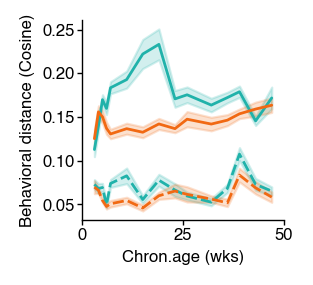

In [14]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cosine, jensenshannon
import matplotlib.pyplot as plt
import seaborn as sns

# Function to filter weeks with more than n measures
n = 3
def filter_valid_weeks(df):
    df = df.reset_index()
    df['week'] = df['age'].astype(float) // 1
    valid_weeks = df.groupby(['mouse', 'sex', 'week']).filter(lambda x: len(x) > n)
    return valid_weeks.set_index(['mouse', 'age', 'sex', 'week'])

# Function to calculate pairwise distances
def calculate_pairwise_distances(df, distance_func):
    distance_list = []
    for (week, sex), group in df.groupby(['week', 'sex']):
        mice = group.index.get_level_values('mouse').unique()
        for i in range(len(mice)):
            for j in range(i + 1, len(mice)):
                mouse_i_data = group.xs(mice[i], level='mouse', drop_level=False)
                mouse_j_data = group.xs(mice[j], level='mouse', drop_level=False)
                distance = np.mean([distance_func(mouse_i_data.iloc[k], mouse_j_data.iloc[l])
                                    for k in range(len(mouse_i_data)) for l in range(len(mouse_j_data))])
                distance_list.append((week, sex, 'Inter-Individual', distance, mice[i]))
    distance_df = pd.DataFrame(distance_list, columns=['week', 'sex', 'type', f'{distance_func.__name__}_distance', 'mouse'])
    distance_df = distance_df.set_index(['week', 'sex', 'type', 'mouse'])
    return distance_df

# Function to calculate intra-individual distances within the same sex
def calculate_intra_individual_distances(df, distance_func):
    intra_distances = []
    for (week, sex), group in df.groupby(['week', 'sex']):
        mice = group.index.get_level_values('mouse').unique()
        for mouse in mice:
            mouse_data = group.xs(mouse, level='mouse', drop_level=False)
            distance = np.mean([distance_func(mouse_data.iloc[i], mouse_data.iloc[j]) for i in range(len(mouse_data)) for j in range(i + 1, len(mouse_data))])
            intra_distances.append((week, sex, 'Intra-Individual', distance, mouse))
    intra_df = pd.DataFrame(intra_distances, columns=['week', 'sex', 'type', f'{distance_func.__name__}_distance', 'mouse'])
    intra_df = intra_df.set_index(['week', 'sex', 'type', 'mouse'])
    return intra_df

# Function to plot distances
def plot_distances(df, distance_name):
    fig = plt.figure(figsize=(1.3, 1.3))
    df = df.reset_index()
    sns.lineplot(x='week', y=f'{distance_name}_distance', hue='sex', hue_order=['m','f'],
                 style='type', data=df, palette=['#20B2AA', '#f16913'], errorbar=('se'), legend=False)
    plt.xlabel('Chron.age (wks)')
    plt.ylabel(f'Behavioral distance ({distance_name.capitalize()})')
    plt.xticks([0, 25, 50])  # Set x-axis ticks to 0, 25, 50
    #plt.legend(title='Sex and Type')
    sns.despine()
    plt.show()
    c = PlotConfig()
    fig.savefig(c.dana_save_path / "fig3" / f'07_25_intra_inter_{distance_name.capitalize()}_Distance_longv2.pdf')

# Main processing
#distances = [euclidean, cosine, jensenshannon]
distances = [cosine]

df_valid = filter_valid_weeks(data)

for distance_func in distances:
    inter_individual_distances = calculate_pairwise_distances(df_valid, distance_func)
    intra_individual_distances = calculate_intra_individual_distances(df_valid, distance_func)
    
    inter_individual_distances = inter_individual_distances.groupby(['mouse','week','sex','type']).mean().reset_index()
    intra_individual_distances = intra_individual_distances.groupby(['mouse','week','sex','type']).mean().reset_index()
    
    #inter_individual_distances = inter_individual_distances.set_index(['week', 'sex', 'type', 'mouse'])

    combined_distances = pd.concat([inter_individual_distances, intra_individual_distances])
    plot_distances(combined_distances, distance_func.__name__)


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import pinv_extended  
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tabulate import tabulate

def fit_1mixed_linear_models(data, dependent_var, factor1, group):
    
    align_data = data.copy()
    align_data['ranked_response'] = align_data[[dependent_var]]

    #formula = f'ranked_response ~ {factor1}*{group}'
    formula = f'ranked_response ~ {factor1}'
        
    # Fit the mixed linear model
    model = smf.mixedlm(formula, align_data, groups=f'{group}')
    result = model.fit()
    return result


def fit_2mixed_linear_models(data, dependent_var, factor1,factor2, group):
    
    align_data = data.copy()
    align_data['ranked_response'] = align_data[[dependent_var]]

    #formula = f'ranked_response ~ {factor1}*{group}'
    formula = f'ranked_response ~ {factor1}*C({factor2})'
        
    # Fit the mixed linear model
    model = smf.mixedlm(formula, align_data, groups=f'{group}')
    result = model.fit()
    return result


def fit_3mixed_linear_models(data, dependent_var, factor1,factor2,factor3, group):
    
    align_data = data.copy()
    align_data['ranked_response'] = align_data[[dependent_var]]

    #formula = f'ranked_response ~ {factor1}*{group}'
    formula = f'ranked_response ~ {factor1}*C({factor2})*C({factor3})'
        
    # Fit the mixed linear model
    model = smf.mixedlm(formula, align_data, groups=f'{group}')
    result = model.fit()
    return result


def extract_summary_to_dataframe(results, num_tests):
    summary_data = []

    for var, result in results.items():
        summary = result.summary()
        coefs = result.params
        pvalues = result.pvalues
        conf_int = result.conf_int()
        
        for param in coefs.index:
            pvalue_corrected = min(pvalues[param] * num_tests, 1.0)  # Apply Bonferroni correction
            
            summary_data.append({
                'Dependent Variable': var,
                'Parameter': param,
                'Coefficient': coefs[param],
                'P-value': pvalues[param],
                'Corrected P-value': pvalue_corrected,
                'CI Lower': conf_int[0][param],
                'CI Upper': conf_int[1][param]
            })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [16]:
data = combined_distances.set_index(['mouse', 'week', 'sex', 'type']).copy()
temp = data.copy()
temp.reset_index(inplace=True)

if 'level_0' in temp.columns:
    temp.drop(columns=['level_0'], inplace=True)

results={}
syll = data.columns
n=len(syll)
ss=[]
ps=[]
ints=[]
intp=[]

for i in syll:
    result=fit_3mixed_linear_models(temp, i, 'week','sex','type','mouse')
    results[i] = result
    
# Extract the summary to a DataFrame with Bonferroni correction
num_tests = len(data.columns)  # Number of tests is the number of dependent variables (excluding 'age' and 'mouse')
summary_df = extract_summary_to_dataframe(results, num_tests)

# Print the DataFrame nicely
print(summary_df)
summary_df.to_csv('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/stats/mxlm_fvm_longv2_intra_vs_inter.csv', index=False)

  Dependent Variable                                     Parameter  \
0    cosine_distance                                     Intercept   
1    cosine_distance                                   C(sex)[T.m]   
2    cosine_distance                   C(type)[T.Intra-Individual]   
3    cosine_distance       C(sex)[T.m]:C(type)[T.Intra-Individual]   
4    cosine_distance                                          week   
5    cosine_distance                              week:C(sex)[T.m]   
6    cosine_distance              week:C(type)[T.Intra-Individual]   
7    cosine_distance  week:C(sex)[T.m]:C(type)[T.Intra-Individual]   
8    cosine_distance                                     mouse Var   

   Coefficient        P-value  Corrected P-value  CI Lower  CI Upper  
0     0.135129  8.904004e-258      8.904004e-258  0.127407  0.142851  
1     0.039232   2.582629e-12       2.582629e-12  0.028245  0.050219  
2    -0.080306   1.155164e-61       1.155164e-61 -0.089805 -0.070807  
3    -0.028150 

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [17]:
data = inter_individual_distances.set_index(['mouse', 'week', 'sex', 'type']).copy()
temp = data.copy()
temp.reset_index(inplace=True)

if 'level_0' in temp.columns:
    temp.drop(columns=['level_0'], inplace=True)

results={}
syll = data.columns
n=len(syll)
ss=[]
ps=[]
ints=[]
intp=[]

for i in syll:
    result=fit_2mixed_linear_models(temp, i, 'week','sex','mouse')
    results[i] = result
    
# Extract the summary to a DataFrame with Bonferroni correction
num_tests = len(data.columns)  # Number of tests is the number of dependent variables (excluding 'age' and 'mouse')
summary_df = extract_summary_to_dataframe(results, num_tests)

# Print the DataFrame nicely
print(summary_df)
summary_df.to_csv('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/stats/mxlm_fvm_longv2_intra_vs_inter_only_inter.csv', index=False)

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


  Dependent Variable         Parameter  Coefficient        P-value  \
0    cosine_distance         Intercept     0.135472  3.861523e-122   
1    cosine_distance       C(sex)[T.m]     0.039100   1.533259e-06   
2    cosine_distance              week     0.000423   4.753793e-03   
3    cosine_distance  week:C(sex)[T.m]    -0.000373   8.550202e-02   
4    cosine_distance         mouse Var     0.268350   2.269217e-03   

   Corrected P-value  CI Lower  CI Upper  
0      3.861523e-122  0.124174  0.146769  
1       1.533259e-06  0.023157  0.055043  
2       4.753793e-03  0.000129  0.000717  
3       8.550202e-02 -0.000799  0.000052  
4       2.269217e-03  0.096048  0.440652  


In [18]:
data = intra_individual_distances.set_index(['mouse', 'week', 'sex', 'type']).copy()
temp = data.copy()
temp.reset_index(inplace=True)

if 'level_0' in temp.columns:
    temp.drop(columns=['level_0'], inplace=True)

results={}
syll = data.columns
n=len(syll)
ss=[]
ps=[]
ints=[]
intp=[]

for i in syll:
    result=fit_2mixed_linear_models(temp, i, 'week','sex','mouse')
    results[i] = result
    
# Extract the summary to a DataFrame with Bonferroni correction
num_tests = len(data.columns)  # Number of tests is the number of dependent variables (excluding 'age' and 'mouse')
summary_df = extract_summary_to_dataframe(results, num_tests)

# Print the DataFrame nicely
print(summary_df)
summary_df.to_csv('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/stats/mxlm_fvm_longv2_intra_vs_inter_only_intra.csv', index=False)

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


  Dependent Variable         Parameter  Coefficient       P-value  \
0    cosine_distance         Intercept     0.054656  4.700429e-94   
1    cosine_distance       C(sex)[T.m]     0.011046  3.617159e-03   
2    cosine_distance              week     0.000226  2.888034e-02   
3    cosine_distance  week:C(sex)[T.m]    -0.000060  6.883072e-01   
4    cosine_distance         mouse Var     0.000222  9.909783e-01   

   Corrected P-value  CI Lower  CI Upper  
0       4.700429e-94  0.049449  0.059862  
1       3.617159e-03  0.003605  0.018486  
2       2.888034e-02  0.000023  0.000429  
3       6.883072e-01 -0.000352  0.000232  
4       9.909783e-01 -0.038336  0.038781  


/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.628383
  warnings.warn(msg, ConvergenceWarning)
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
